# House Price Prediction - Advanced Regression Assignment

In [1206]:
#Lets import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import RFE

In [1207]:
#Let us load and read the dataset
housing=pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1208]:
#Lets inspect the dataset
housing.shape

(1460, 81)

In [1209]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1210]:
housing.describe()
#housing.describe([0.25,0.50,0.75, .90, .95, 0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1211]:
#Lets check if there are duplicates for the Ids
sum(housing.duplicated(subset='Id')) == 0

True

OBSERVATION: There are no duplicates rows observed.

In [1212]:
#Lets check the percentage of NULL/missing values in all the columns
null_cols = housing.isnull().sum()/len(housing.index)*100
null_cols

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

OBSERVATION: There are mulitple columns with high nulls, lets filter the columns having null values

In [1213]:
#lets filter and group them together
null_cols = null_cols[null_cols>0]
null_cols.sort_values(inplace=True, ascending=False)
null_cols

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

OBSERVATION: According to the given data dictionary, the null values in the columns indicates the absence of facilities which may affect the price. Hence, let us first impute the categorical variables with 'None'.

## Exploratory Data Analysis

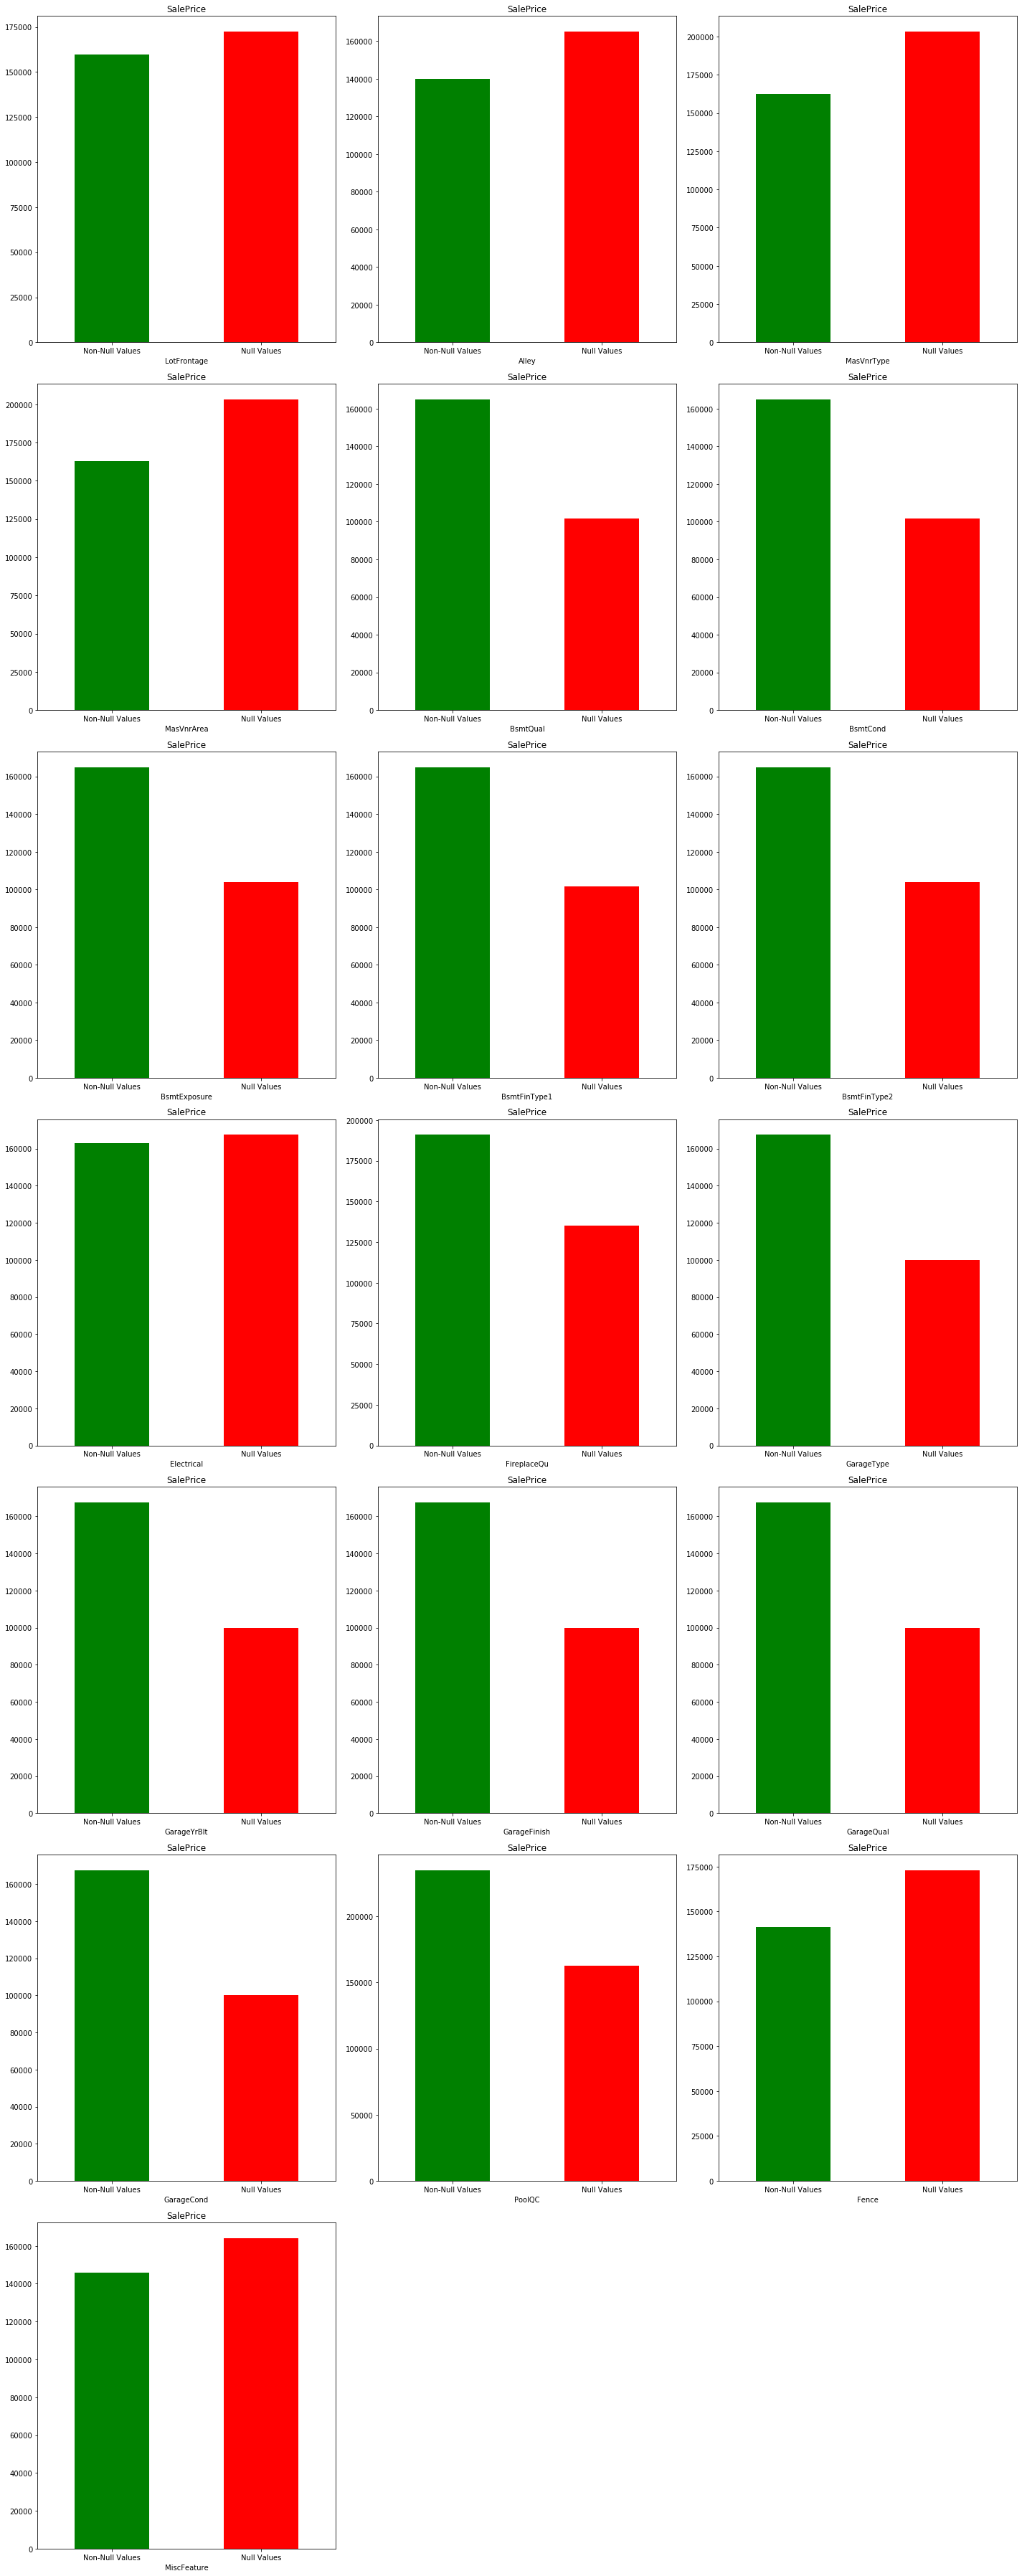

In [1214]:
#Let us check whether NaN values have any impact on the Sale Price or not.
nan_cols=[]
for col in housing.columns:
    if housing[col].isnull().sum() > 0:
        nan_cols.append(col)
housing_copy=housing.copy()
fig,axs=plt.subplots(7,3, figsize=(20,50), squeeze=True)
for i,ax in zip(nan_cols, axs.flatten()):
    housing_copy[i]=np.where(housing_copy[i].isnull(), 'Null Values', 'Non-Null Values')
    housing_copy.groupby(i)['SalePrice'].median().plot.bar(color=list('gr'), rot=0, ax=ax, subplots=True)
axs[6,1].set_axis_off()
axs[6,2].set_axis_off()
plt.show()

OBSERVATION: The NaN values have some impact on the Sale Price. We are going to handle the missing values of the columns at a later stage after Exploratory Data Analysis and in the feature engineering section.

In [1215]:
#Lets check the count of numerical/continuous variables and the count of categorical variables.
num_cols=[]
cat_cols=[]
for col in housing.columns:
    if housing[col].dtypes != 'O':
        num_cols.append(col)
    else:
        cat_cols.append(i)
print('Numerical features in the dataset: ', len(num_cols))
print('Categorical features in the dataset: ', len(cat_cols))

Numerical features in the dataset:  38
Categorical features in the dataset:  43


In [1216]:
#Let us drop the Id column from the data set since it is not adding any value in the prediction
housing.drop('Id', axis=1, inplace=True)

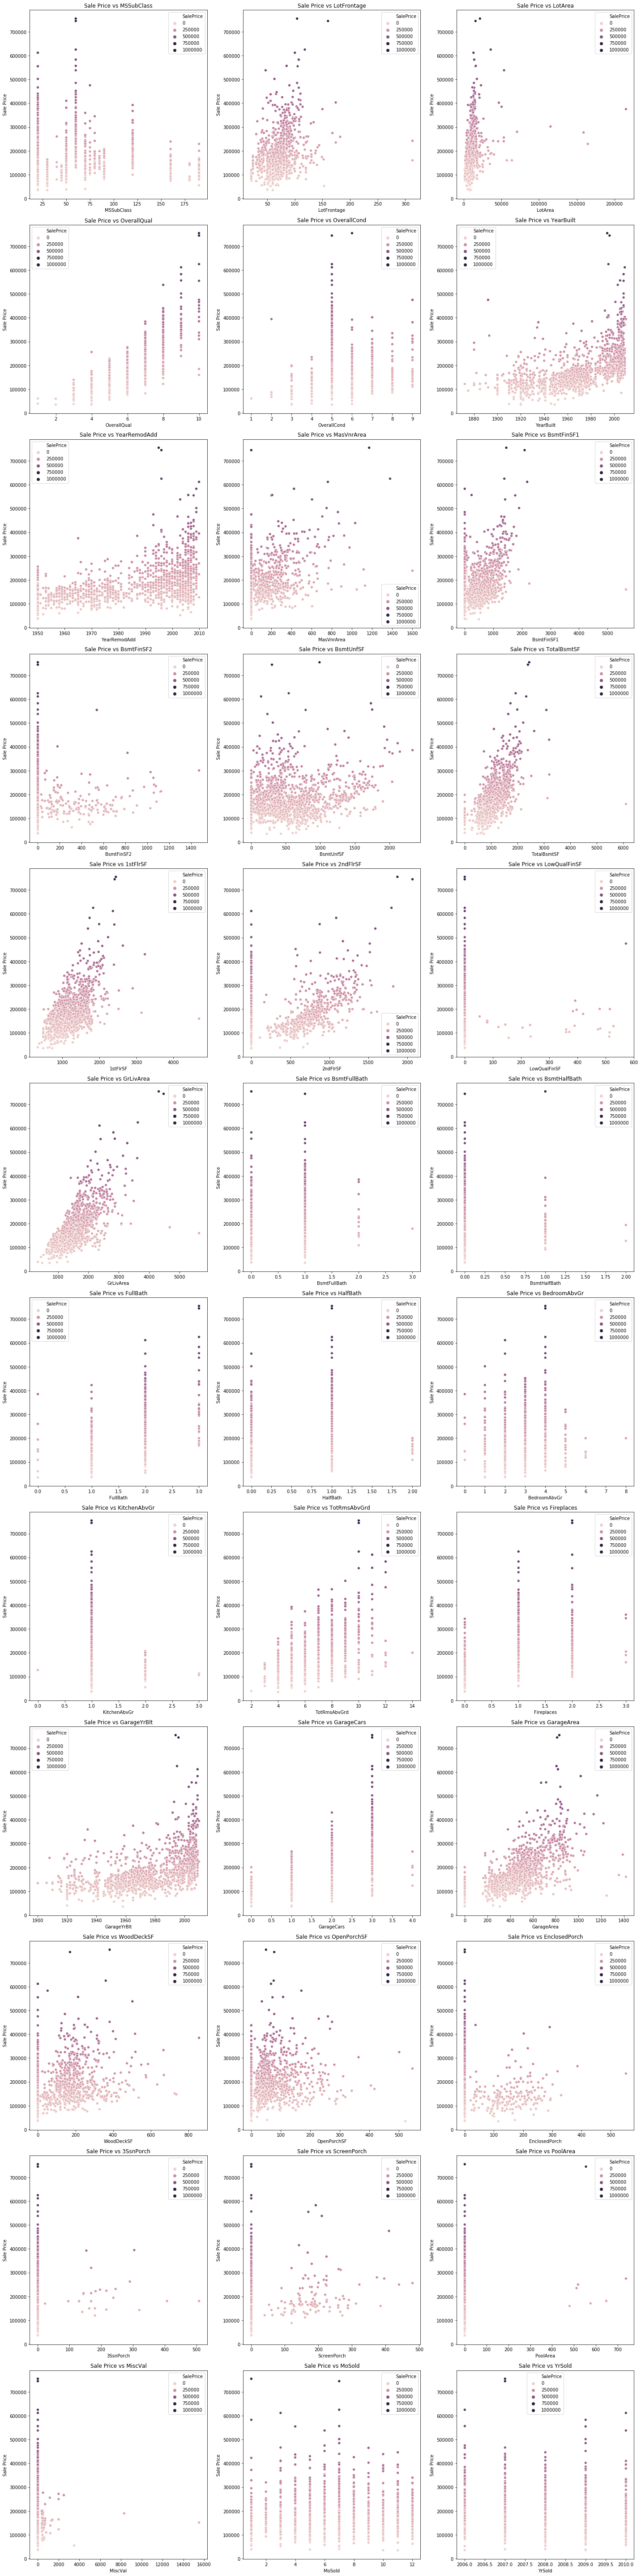

In [1217]:
#Let us analyze by visualization all the numerical predictor variables against the target variable 'SalePrice'
housing_num=housing.select_dtypes(include=['int64', 'float64'])
plt.rcParams["figure.autolayout"] = True
fig,axs=plt.subplots(12,3, figsize=(20,80))
for col,ax in zip(housing_num.columns, axs.flatten()):
    sns.scatterplot(x=col, y='SalePrice', hue='SalePrice', data=housing_num, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Sale Price')
    ax.set_title('Sale Price '+'vs '+str(col))

OBSERVATION
* New properties are costlier than older properties.
* Above grade (ground) living area square feet has a direct co-relation with the price of the housing property.
* Total square feet of basement area is also linearly related to the price of the property.
* Month sold has no effect on the price of the property.

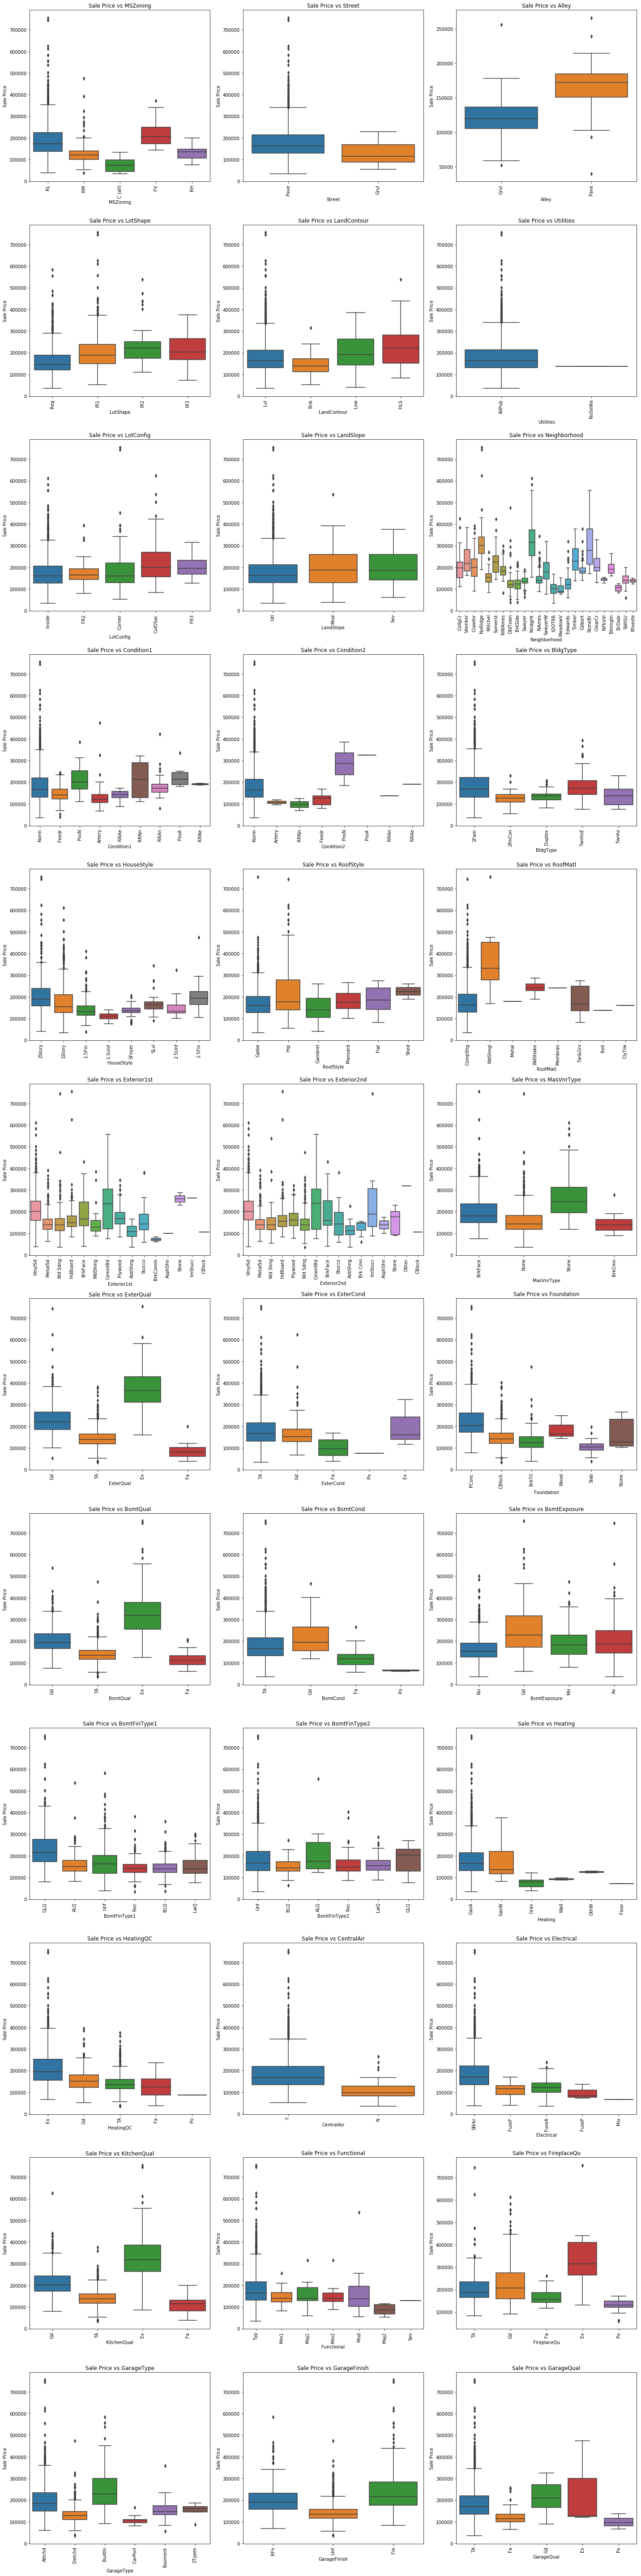

In [1218]:
housing_cat=housing.select_dtypes(exclude=['int64', 'float64'])
plt.rcParams["figure.autolayout"] = True
fig,axs=plt.subplots(12,3, figsize=(20,80))
for col,ax in zip(housing_cat.columns, axs.flatten()):
    sns.boxplot(x=col, y='SalePrice', data=housing, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel(col)
    ax.set_ylabel('Sale Price')
    ax.set_title('Sale Price '+'vs '+str(col))
plt.show()

OBSERVATION:
* There are a few outliers which we need to handle before performing feature engineering by capping them to a lower percentile.
* Housing Properties with Paved alleys and streets demand a higher price.
* Housing properties where the basement quality is good and excellent demand a higher price compared to others.
* Houses with good and excellent garages demand higher prices.
* Houses with good quality kitchens also demand high price.

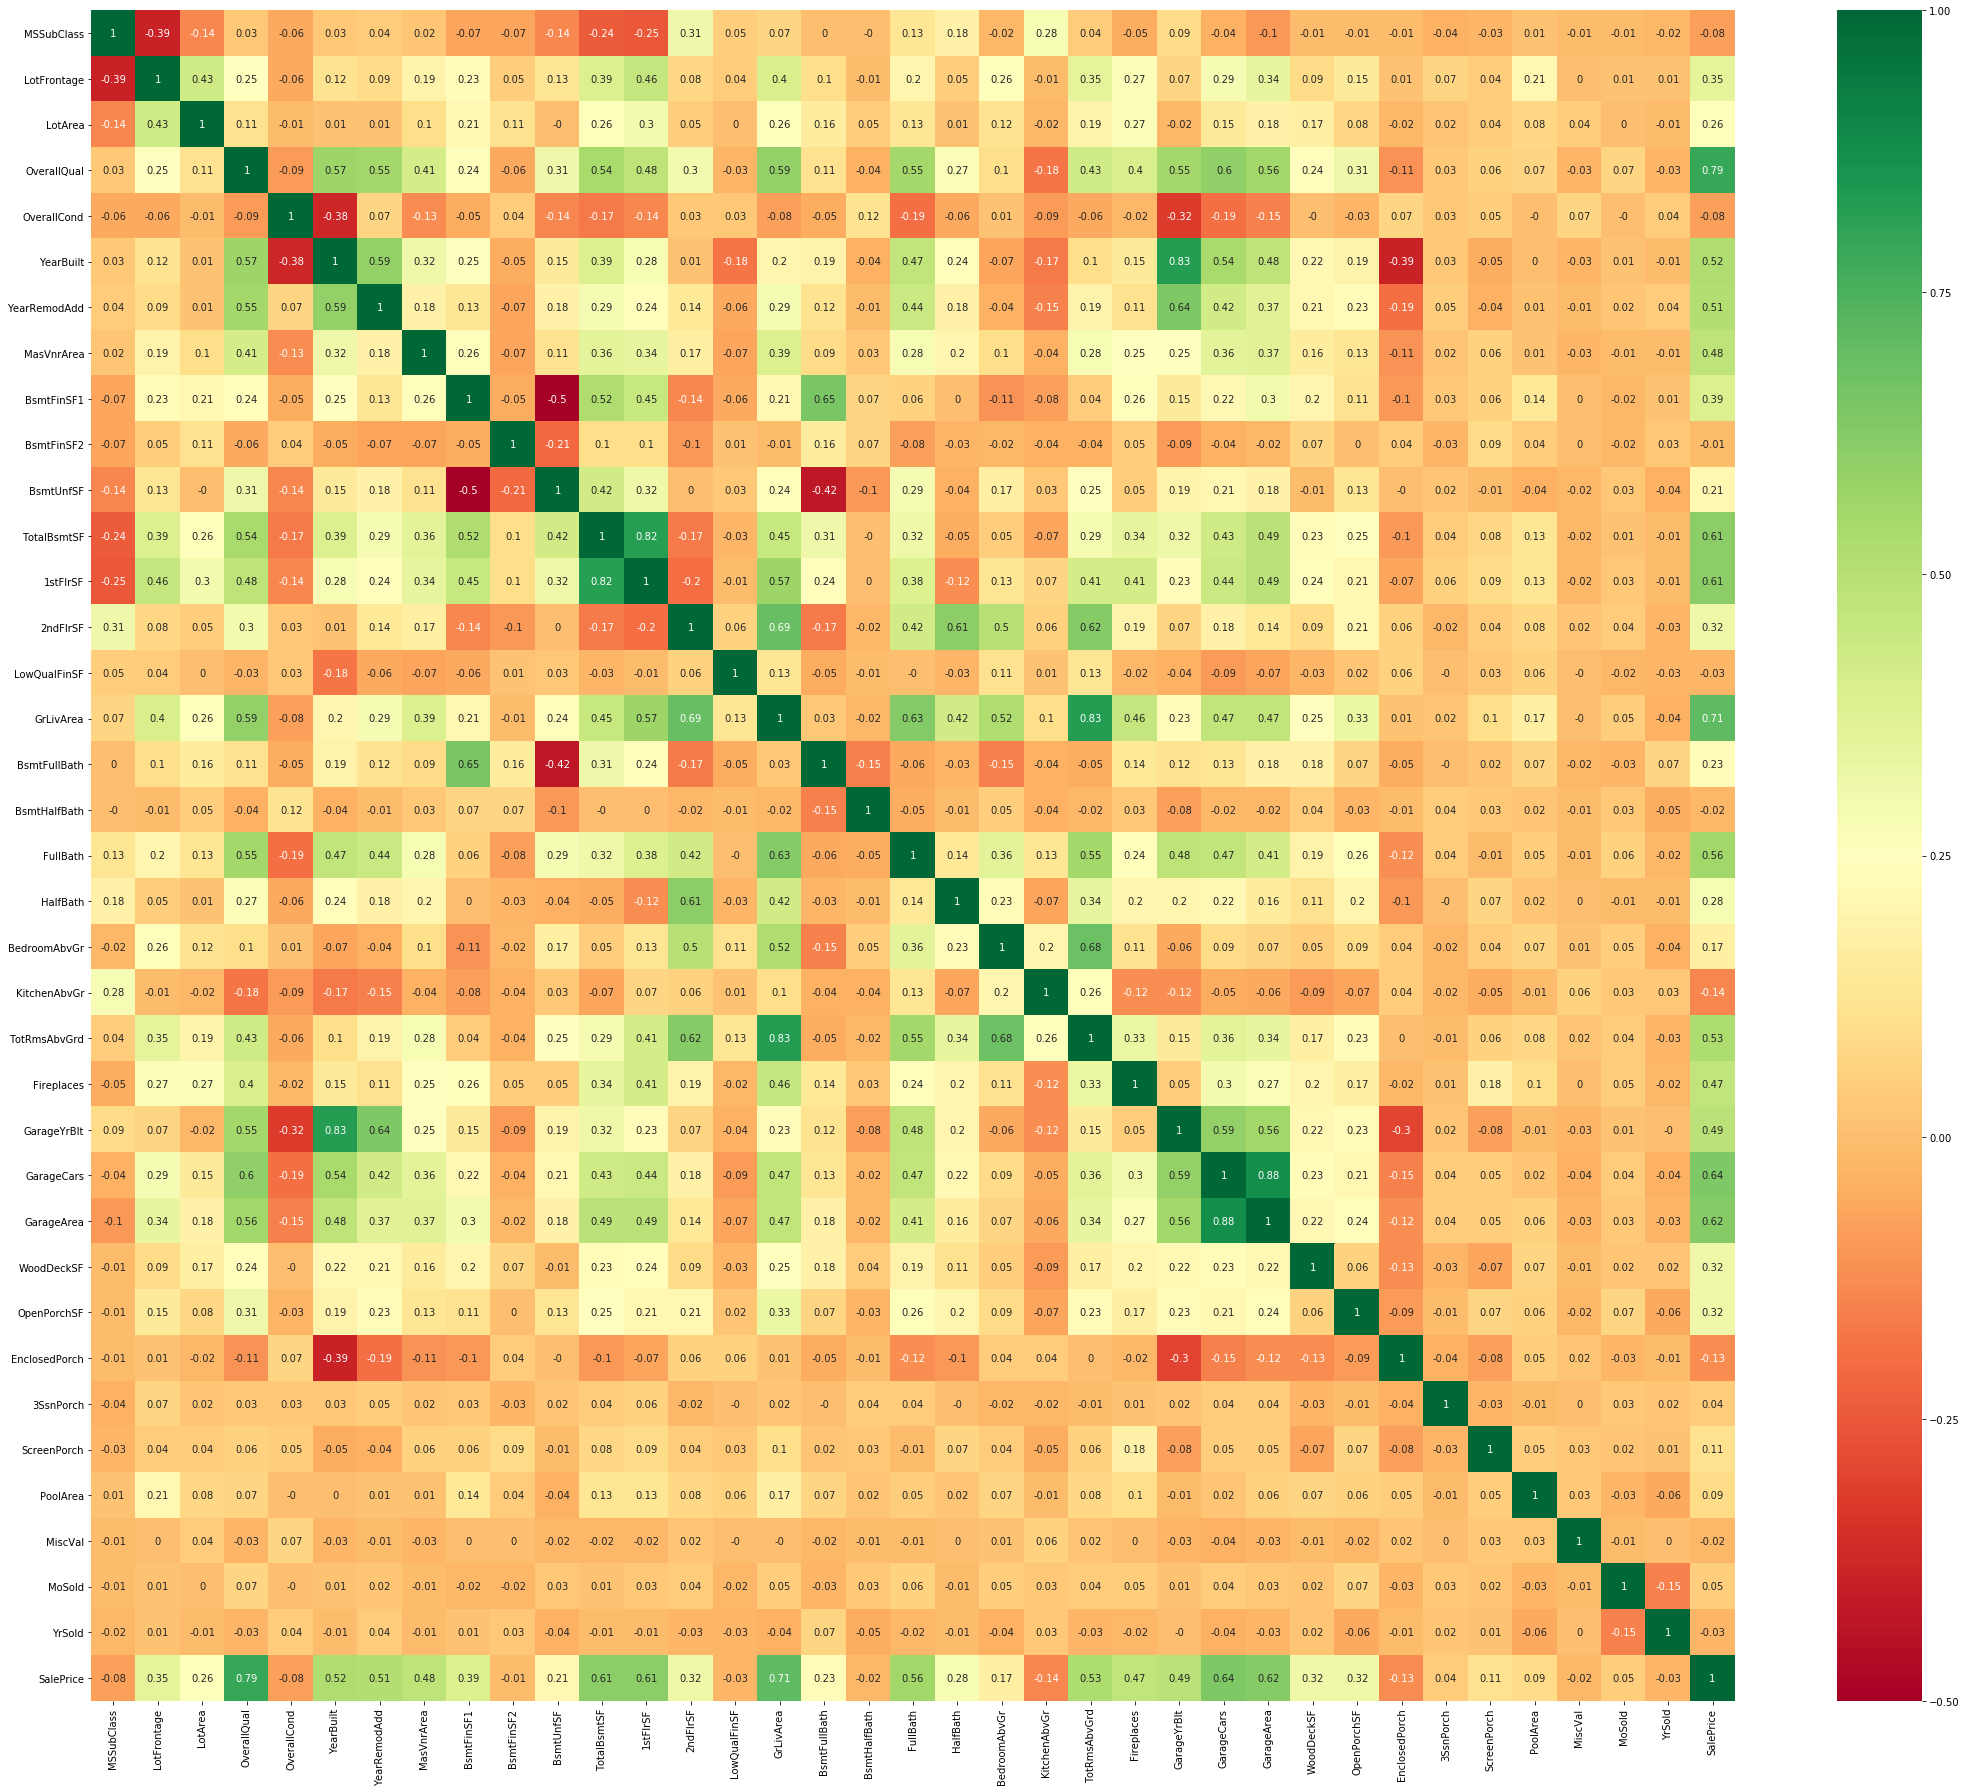

In [1219]:
#Lets check the corelation and plot heatmap of numerical features
plt.subplots(figsize=(30,25))
sns.heatmap(round(housing_num.corr(), 2), cmap='RdYlGn', annot=True)
plt.show()

OBSERVATION: It is clear that there are highly correlated features. We should remove them.

## Data Preparation

In [1220]:
# Let us create new columns to determine the age of the property
housing['Age'] = housing['YrSold']-housing['YearBuilt']
housing['Garage_Age'] = housing['YrSold'] - housing['GarageYrBlt']
housing['Remodel_Age'] = housing['YrSold'] - housing['YearRemodAdd']

housing.drop('GarageYrBlt',axis=1,inplace=True)

In [1221]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

OBSERVATION: There are some numerical columns which need to be converted to string columns since they are regarded as categorical variables.

In [1222]:
# Let us convert the Year to String since they are categorical features and should not be treated as numerical features
housing[['MSSubClass']] = housing[['MSSubClass']].astype(str) 
housing['YrSold'] = housing['YrSold'].astype(str)
housing['MoSold'] = housing['MoSold'].astype(str)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,Garage_Age,Remodel_Age
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5,5.0,5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31,31.0,31
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7,7.0,6
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91,8.0,36
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8,8.0,8


## Handling Missing Values

In [1223]:
null_cols = housing.isnull().sum()/len(housing.index)*100
null_cols = null_cols[null_cols>0]
null_cols.sort_values(inplace=True, ascending=False)
null_cols

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
Garage_Age       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [1224]:
# Let us do data imputation for the columns by replacing Nan values with None, Default or similar values.
#NA = No Pool for PoolQC
housing['PoolQC'] = housing['PoolQC'].fillna('None')
#NA = No Misc Feature for MiscFeature
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')
#NA = No Alley
housing['Alley'] = housing['Alley'].fillna('None')
#NA = No Fireplace for FireplaceQu
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('None')
#NA = No Fence
housing['Fence'] = housing['Fence'].fillna('None')
#NA = No Fireplace
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('None')
#NA = No Garage
housing['GarageCond'] = housing['GarageCond'].fillna('None')
housing['GarageType'] = housing['GarageType'].fillna('None')
housing['GarageFinish'] = housing['GarageFinish'].fillna('None')
housing['GarageQual'] = housing['GarageQual'].fillna('None')
housing['Garage_Age'] = housing['Garage_Age'].fillna(0)   # Filing with 0 since No Garage means No Age
#NA = No Basement
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('None')
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('None')
housing['BsmtCond'] = housing['BsmtCond'].fillna('None')
housing['BsmtQual'] = housing['BsmtQual'].fillna('None')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('None')
#NA = No Masonery Area
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

In [1225]:
#Let us get the nul columns again 
null_cols = housing.isnull().sum()/len(housing.index)*100
null_cols = null_cols[null_cols>0]
null_cols.sort_values(inplace=True, ascending=False)
null_cols

LotFrontage    17.739726
Electrical      0.068493
dtype: float64

In [1226]:
#LotFrontage : Let us impute Null value with the median of the neighbourhood
housing['LotFrontage'] = housing.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [1227]:
#Let us get the nul columns again 
null_cols = housing.isnull().sum()/len(housing.index)*100
null_cols = null_cols[null_cols>0]
null_cols.sort_values(inplace=True, ascending=False)
null_cols

Electrical    0.068493
dtype: float64

In [1228]:
# Let us impute the Electrical values with 0.06% rows with mode
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])

In [1229]:
#Let us get the nul columns again 
null_cols = housing.isnull().sum()/len(housing.index)*100
null_cols = null_cols[null_cols>0]
null_cols.sort_values(inplace=True, ascending=False)
null_cols

Series([], dtype: float64)

OBSERVATION: All missing values are handled.

## Outlier Treatment 

In [1230]:
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

In [1231]:
num_cols=[]
for col in housing.columns:
    if housing[col].dtypes != 'O':
        num_cols.append(col)

In [1232]:
# outlier treatment. 
def drop_outliers(x):
    list = []
    for col in num_cols:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))]
    return x

In [1233]:
housing.shape

(1460, 82)

In [1234]:
housing = drop_outliers(housing)

In [1235]:
housing.shape

(1439, 82)

OBSERVATION: Outliers have been removed.

In [1236]:
#Let us create some new features based on the existing features
#Vintage house with remodified version of it plays an important role in prediction(i.e. high price )
housing['YrBltAndRemod']=housing['YearBuilt']+housing['YearRemodAdd']
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
housing['Total_sqr_footage'] = (housing['BsmtFinSF1'] + housing['BsmtFinSF2'] + housing['1stFlrSF'] + housing['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
housing['Total_Bathrooms'] = (housing['FullBath'] + (0.5 * housing['HalfBath']) + housing['BsmtFullBath'] + (0.5 * housing['BsmtHalfBath']))
#Creating derived column for total porch area 
housing['Total_porch_sf'] = (housing['OpenPorchSF'] + housing['3SsnPorch'] + housing['EnclosedPorch'] + housing['ScreenPorch'] + housing['WoodDeckSF'])

In [1237]:
#Lets create Dummy Variables for Categorical Columns
num_col=[]
cat_col=[]
for i in housing.columns:
    if housing[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
housing_dummy= pd.get_dummies(housing[cat_col], drop_first=True)
housing=pd.concat([housing, housing_dummy],axis=1)
housing= housing.drop(cat_col,axis=1)

In [1238]:
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Garage_Age,Remodel_Age,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeatu

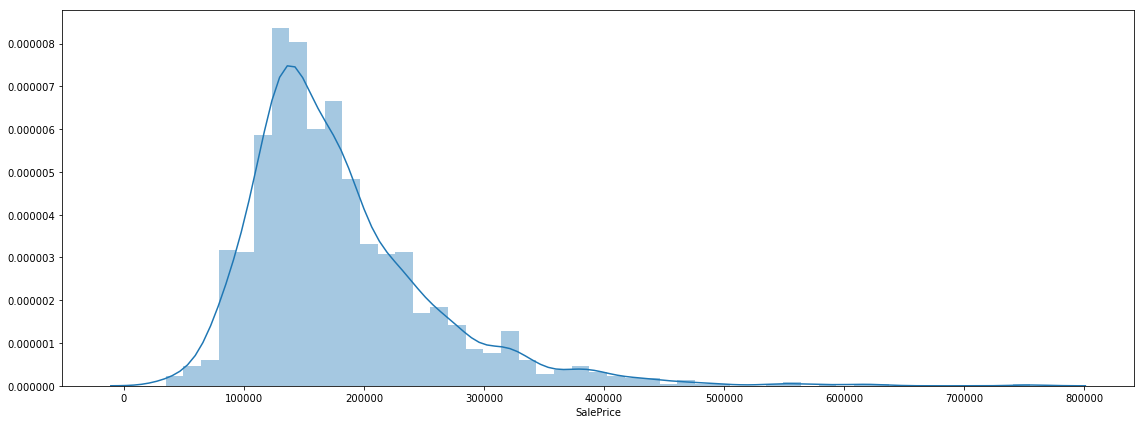

In [1239]:
# Let us check the distribution of our target/dependent variable 'SalePrice' before scaling and splitting
plt.figure(figsize=(16,6))
sns.distplot(housing.SalePrice)
plt.show()

In [1240]:
# Let us create train and test data sets for validation purpose
housing_train,housing_test = train_test_split(housing,train_size=0.7,test_size=0.3,random_state=42)

In [1241]:
# Now, as scale of our dependent variable SalePrice is very different from the independent variables,
# hence we are going to scale the dependent variables.
scaler = StandardScaler()
housing_train[num_col] = scaler.fit_transform(housing_train[num_col])
housing_test[num_col] = scaler.transform(housing_test[num_col])

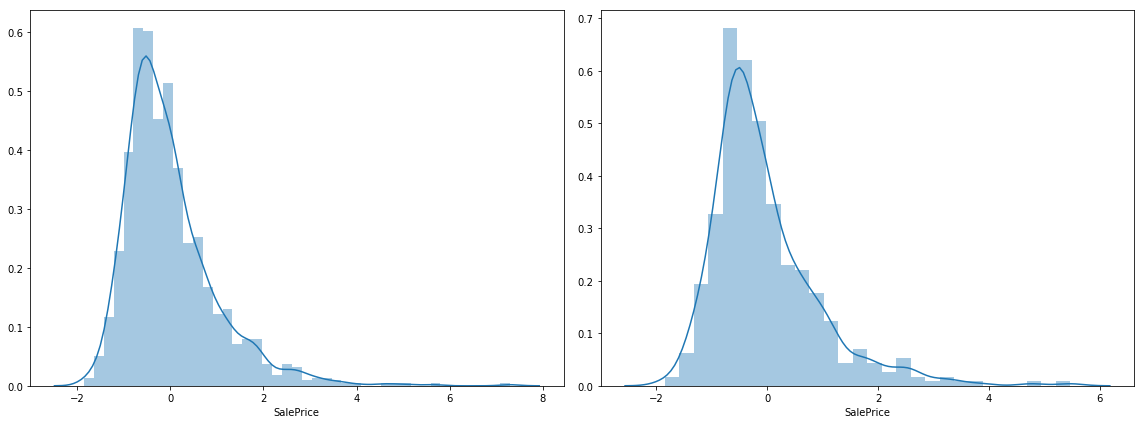

In [1242]:
#Let us check the distribution of dependent variable after scaling.
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(housing_train.SalePrice)
plt.subplot(122)
sns.distplot(housing_test.SalePrice)
plt.show()

In [1243]:
#Let us split the dependent and independent variable.
y_train = housing_train.pop('SalePrice')
X_train = housing_train

In [1244]:
y_test = housing_test.pop('SalePrice')
X_test = housing_test

In [1245]:
len(X_train.columns)

284

In [1246]:
# Now, using RFE lets try to find the optimal number of features.
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=70, step=1, verbose=0)

In [1247]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [1248]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)


In [1249]:
#Let us filter the train and test sets for the RFE selected columns
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Using Lasso Regression Model

In [1250]:
folds = 5

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
model = Lasso()
model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [1251]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.046872,0.000798,0.835262,0.903575,0.0001,{'alpha': 0.0001},1,0.868816,0.906899,0.876000,0.904480,0.651075,0.904738,0.867103,0.906212,0.912947,0.895544,0.005969,0.000399,0.093473,0.004115
1,0.038097,0.000399,0.834289,0.898960,0.0010,{'alpha': 0.001},2,0.868267,0.902270,0.874183,0.900092,0.657511,0.900398,0.861645,0.902411,0.909471,0.889627,0.007339,0.000489,0.089811,0.004761
2,0.010969,0.000800,0.787621,0.821518,0.0100,{'alpha': 0.01},3,0.818177,0.817458,0.826132,0.815620,0.639374,0.852811,0.813494,0.817701,0.840583,0.804003,0.004968,0.000400,0.074599,0.016443
3,0.002593,0.000397,0.728295,0.743695,0.1000,{'alpha': 0.1},4,0.739015,0.742749,0.738697,0.744667,0.646080,0.769099,0.755575,0.732707,0.762001,0.729256,0.000485,0.000487,0.042062,0.013974
4,0.001992,0.000607,-0.002463,0.000000,1.0000,{'alpha': 1},5,-0.004691,0.000000,-0.000548,0.000000,-0.001922,0.000000,-0.000012,0.000000,-0.005141,0.000000,0.000003,0.000495,0.002102,0.000000


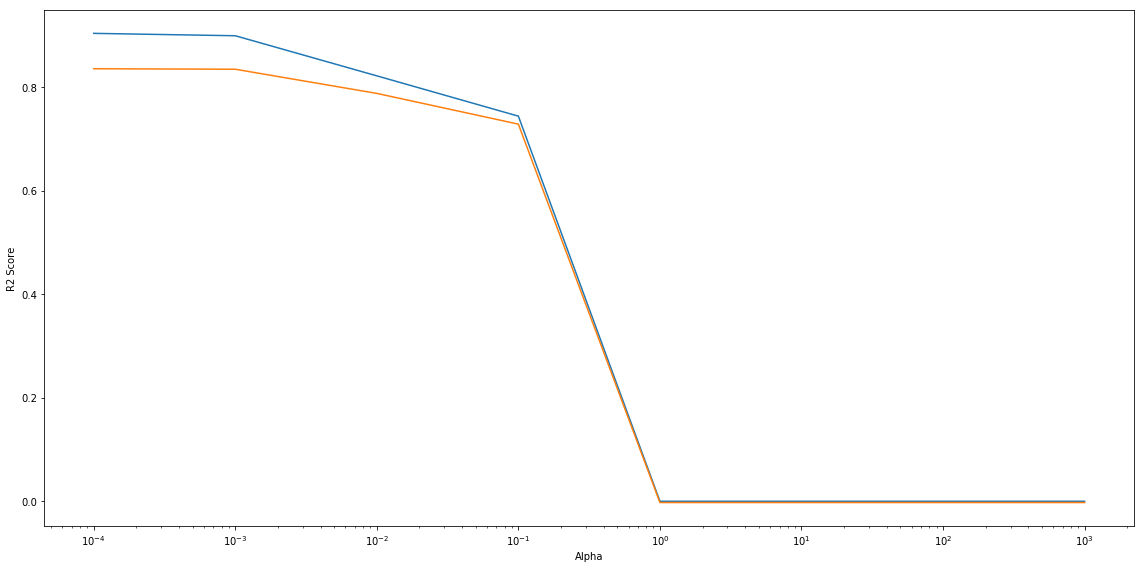

In [1252]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [1253]:
# Let us check the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [1254]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.901833200777
0.775686557023


In [1255]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = housing_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [1256]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
39,MSSubClass_160,1.661479
36,Total_sqr_footage,0.801819
48,MSSubClass_70,0.729687
27,EnclosedPorch,0.464683
30,PoolArea,0.458387
28,3SsnPorch,0.449309
29,ScreenPorch,0.424282
68,LotConfig_FR2,0.416400
0,LotFrontage,0.382299
31,MiscVal,0.341944


## Using Ridge Regression Model

In [1257]:
model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [1258]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.005587,0.000795,0.835151,0.903693,0.0001,{'alpha': 0.0001},1,0.868081,0.906978,0.876427,0.904602,0.650145,0.904853,0.867850,0.906329,0.912885,0.895702,0.001623,0.000397,0.093865,0.004093
1,0.005388,0.000795,0.835150,0.903692,0.0010,{'alpha': 0.001},2,0.868088,0.906978,0.876420,0.904601,0.650142,0.904853,0.867844,0.906329,0.912889,0.895702,0.001737,0.000398,0.093866,0.004093
2,0.006187,0.000794,0.835139,0.903688,0.0100,{'alpha': 0.01},3,0.868159,0.906972,0.876345,0.904597,0.650118,0.904852,0.867784,0.906324,0.912919,0.895696,0.001469,0.000397,0.093875,0.004094
3,0.005184,0.000798,0.834972,0.903342,0.1000,{'alpha': 0.1},4,0.868703,0.906548,0.875691,0.904216,0.649857,0.904806,0.867217,0.905927,0.913024,0.895215,0.001596,0.000399,0.093938,0.004145
4,0.003555,0.000393,0.832209,0.893827,1.0000,{'alpha': 1},5,0.868494,0.895025,0.873239,0.893542,0.647295,0.903098,0.863458,0.894919,0.908173,0.882553,0.001035,0.000482,0.093667,0.006569


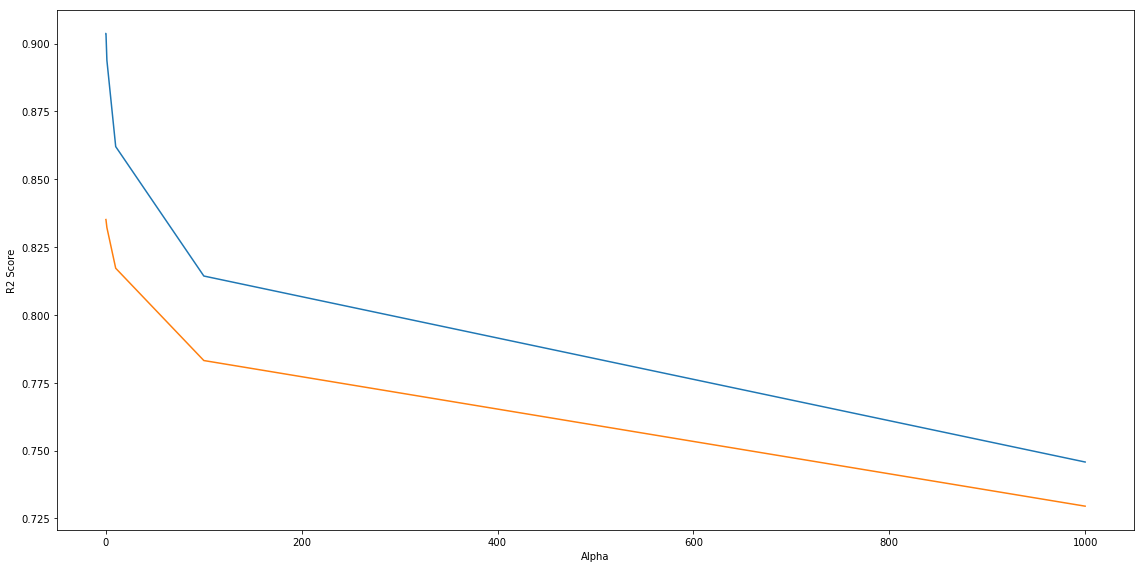

In [1259]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [1260]:
#On the basis of above graph lets create the model

# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [1261]:
ridge = Ridge(alpha = 0.0001)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.902001078039
0.770696418705


In [1262]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = housing_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [1263]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
39,MSSubClass_160,1.688584
36,Total_sqr_footage,0.898970
68,LotConfig_FR2,0.521824
31,MiscVal,0.469450
27,EnclosedPorch,0.468222
30,PoolArea,0.464391
28,3SsnPorch,0.450001
29,ScreenPorch,0.427369
0,LotFrontage,0.402402
37,Total_Bathrooms,0.396804


OBSERVATION: After creating models in both Ridge and Lasso, it appears that the r2_scores are almost same for both of the cases . However, since Lasso will penalize more on the dataset and can help us in performing feature elimination. Hence, we are going to consider that as our final model.

##  Final Model

In [1264]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.901833200777
0.775686557023


OBSERVATION: After comparing both the models we can see that the below 5 features are explaining the given data set:
* MSSubClass_160 - 2-STORY PUD - 1946 & NEWER type of dwelling involved in the sale
* Total_sqr_footage - Overall area for all floors and basement
* MSSubClass_70 - 2-STORY 1945 & OLDER type of dwelling involved in the sale
* EnclosedPorch - Enclosed porch area in square feet
* PoolArea - Pool area in square feet

* Best alpha value for Lasso : {'alpha': 0.0001}
* Best alpha value for Ridge : {'alpha': 0.0001}